<a href="https://colab.research.google.com/github/EumGitae/Machine-Learning/blob/main/lastterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

기말고사(20250613)\
학번 : 2021148022\
성명 : 엄기태

문제 1) ANN Backpropagation

In [126]:
# Back-propagation of ANN with numpy
import numpy as np
import matplotlib.pyplot as plt

# Data Generation
np.random.seed(0)
num_samples = 300

x1 = np.random.uniform(0, 1, num_samples)
x2 = np.random.uniform(0, 1, num_samples)
x3 = np.random.uniform(0, 1, num_samples)

# Target
y = 3 * x1 - 2 * x2 + x3

In [127]:
print(x1.shape)
print(x2.shape)
print(x3.shape)

(300,)
(300,)
(300,)


In [128]:
Input = np.column_stack((x1, x2, x3))

In [129]:
input_layer = 3
hidden_layer = 4
output_layer = 1

In [130]:
W1 = np.random.rand(hidden_layer, input_layer)
b1 = np.random.rand(hidden_layer)
W2 = np.random.rand(output_layer, hidden_layer)
b2 = np.random.rand(output_layer)

In [131]:
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(4, 3)
(4,)
(1, 4)
(1,)


In [132]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))

In [133]:
alpha = 1e-2
epochs = 1000
MSE_list, MAPE_list = [], []

In [134]:
for epoch in range(epochs):
    MSE, MAPE = 0,0
    for iter in range(num_samples):
        X = Input[iter]
        # Feedforward
        Z_tilde = W1@X.reshape(-1,1)+ b1.reshape(-1,1)
        H = sigmoid(Z_tilde)
        y_pred = W2@H.reshape(-1,1) + b2.reshape(-1,1)

        #Calculating the error
        J = ((y_pred - y[iter])**2 ) / 2
        MSE += J
        MAPE += np.abs((y_pred - y[iter])/y[iter]) * 100

        # Backpropagation
        # Output layer -> hidden layer
        dJdy = (y_pred - y[iter])
        dJdW2_11, dJdW2_12, dJdW2_13, dJdW2_14 = dJdy*H[0], dJdy*H[1], dJdy*H[2], dJdy*H[3];
        dJdb2_1 = dJdy
        dJdH1, dJdH2, dJdH3, dJdH4 = dJdy*W2[0, 0], dJdy*W2[0, 1], dJdy*W2[0, 2], dJdy * W2[0, 3]

        # Hidden layer --> Input layer
        dJdW1_11 = dJdH1 * X[0] * sigmoid_derivative(Z_tilde[0])
        dJdW1_12 = dJdH1 * X[1] * sigmoid_derivative(Z_tilde[0])
        dJdW1_13 = dJdH1 * X[2] * sigmoid_derivative(Z_tilde[0])
        dJdW1_21 = dJdH2 * X[0] * sigmoid_derivative(Z_tilde[1])
        dJdW1_22 = dJdH2 * X[1] * sigmoid_derivative(Z_tilde[1])
        dJdW1_23 = dJdH2 * X[2] * sigmoid_derivative(Z_tilde[1])
        dJdW1_31 = dJdH3 * X[0] * sigmoid_derivative(Z_tilde[2])
        dJdW1_32 = dJdH3 * X[1] * sigmoid_derivative(Z_tilde[2])
        dJdW1_33 = dJdH3 * X[2] * sigmoid_derivative(Z_tilde[2])
        dJdW1_41 = dJdH4 * X[0] * sigmoid_derivative(Z_tilde[3])
        dJdW1_42 = dJdH4 * X[1] * sigmoid_derivative(Z_tilde[3])
        dJdW1_43 = dJdH4 * X[2] * sigmoid_derivative(Z_tilde[3])
        dJdb1_1 = dJdH1 * sigmoid_derivative(Z_tilde[0])
        dJdb1_2 = dJdH2 * sigmoid_derivative(Z_tilde[1])
        dJdb1_3 = dJdH3 * sigmoid_derivative(Z_tilde[2])
        dJdb1_4 = dJdH4 * sigmoid_derivative(Z_tilde[3])

        # Update
        W1[0][0] += -alpha * dJdW1_11
        W1[0][1] += -alpha * dJdW1_12
        W1[0][2] += -alpha * dJdW1_13
        W1[1][0] += -alpha * dJdW1_21
        W1[1][1] += -alpha * dJdW1_22
        W1[1][2] += -alpha * dJdW1_23
        W1[2][0] += -alpha * dJdW1_31
        W1[2][1] += -alpha * dJdW1_32
        W1[2][2] += -alpha * dJdW1_33
        W1[3][0] += -alpha * dJdW1_41
        W1[3][1] += -alpha * dJdW1_42
        W1[3][2] += -alpha * dJdW1_43
        b1[0]    += -alpha * dJdb1_1
        b1[1]    += -alpha * dJdb1_2
        b1[2]    += -alpha * dJdb1_3
        b1[3]    += -alpha * dJdb1_4
        W2[0][0] += -alpha * dJdW2_11
        W2[0][1] += -alpha * dJdW2_12
        W2[0][2] += -alpha * dJdW2_13
        W2[0][3] += -alpha * dJdW2_14
        b2[0]    += -alpha*dJdb2_1

    MSE, MAPE = MSE/num_samples, MAPE/num_samples
    MSE_list.append(np.squeeze(MSE))
    MAPE_list.append(np.squeeze(MAPE))
    if epoch % 5 == 0 or epoch == epochs-1:
       print('MSE and MAPE at epoch ', epoch, ' :',
             np.squeeze(MSE), ' ,', np.squeeze(MAPE))

<ipython-input-134-2454093545>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][0] += -alpha * dJdW1_11
<ipython-input-134-2454093545>:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][1] += -alpha * dJdW1_12
<ipython-input-134-2454093545>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][2] += -alpha * dJdW1_13
<ipython-input-134-2454093545>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in

MSE and MAPE at epoch  0  : 0.6201823170877161  , 354.25670549814413
MSE and MAPE at epoch  5  : 0.5554886569876684  , 294.5905241866273
MSE and MAPE at epoch  10  : 0.3573121539512573  , 237.8796154202313
MSE and MAPE at epoch  15  : 0.06499360043787765  , 92.95816488236188
MSE and MAPE at epoch  20  : 0.009995780398267146  , 25.573604818655777
MSE and MAPE at epoch  25  : 0.0039809920611271555  , 12.413457274638983
MSE and MAPE at epoch  30  : 0.00275622340258168  , 12.227604473196262
MSE and MAPE at epoch  35  : 0.002300620170773039  , 12.68990010586455
MSE and MAPE at epoch  40  : 0.0020298757428040396  , 12.847335723399587
MSE and MAPE at epoch  45  : 0.0018327499070977342  , 12.846559817453654
MSE and MAPE at epoch  50  : 0.0016802885950063862  , 12.80341248958079
MSE and MAPE at epoch  55  : 0.001560008762851763  , 12.753586780681758
MSE and MAPE at epoch  60  : 0.0014640954051426574  , 12.711599201435604
MSE and MAPE at epoch  65  : 0.0013869229764259027  , 12.67139209152751
MS

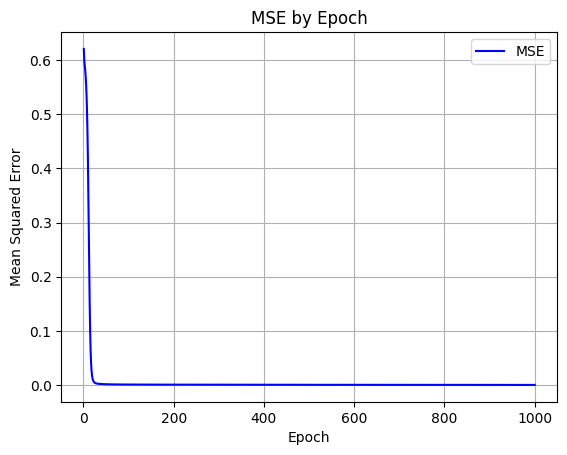

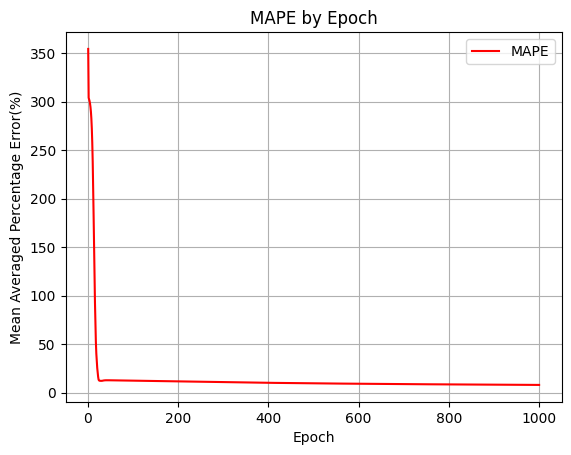

In [135]:
plt.figure()
plt.plot(np.arange(1,epochs+1), MSE_list, label='MSE', linewidth=1.5, color='b')
#plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE by Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(np.arange(1,epochs+1), MAPE_list, label='MAPE', linewidth=1.5, color='r')
#plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Mean Averaged Percentage Error(%)')
plt.title('MAPE by Epoch')
plt.legend()
plt.grid(True)
plt.show()

문제 2) CNN

In [136]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
# 0,1,2,3,4, and 5 finger image data set

train_x = np.load('/content/drive/MyDrive/Colab Notebooks/Finger_train_img.npy')
train_y = np.load('/content/drive/MyDrive/Colab Notebooks/Finger_train_label.npy')

test_x = np.load('/content/drive/MyDrive/Colab Notebooks/Finger_test_img.npy')
test_y = np.load('/content/drive/MyDrive/Colab Notebooks/Finger_test_label.npy')

In [139]:
train_x, test_x = train_x/255.0, test_x/255.0

In [140]:
train_x.shape

(900, 100, 100, 1)

In [141]:
train_x = train_x.reshape((train_x.shape[0], 100, 100, 1))
test_x = test_x.reshape((test_x.shape[0], 100, 100, 1))

In [142]:
# input layer
input_h = 100   # input height
input_w = 100  # input width
input_ch = 1   # input channel : Gray scale

# 1st convolution layer
k1_h = 3
k1_w = 3
k1_ch = 32
p1_h = 2
p1_w = 2

# 2nd convolution layer
k2_h = 3
k2_w = 3
k2_ch = 64
p2_h = 2
p2_w = 2

conv_result_size = 25 * 25 * 64
n_hidden = 100
n_output = 6

In [143]:
# Kernel size : [kernel_height, kernel_width, input_ch, output_ch]
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

weights = {
    'conv1' : tf.Variable(tf.random.normal([k1_h, k1_w, input_ch, k1_ch], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random.normal([k2_h, k2_w, k1_ch, k2_ch], stddev = 0.1)),
    'hidden' : tf.Variable(tf.random.normal([conv_result_size, n_hidden], stddev = 0.1)),
    'output' : tf.Variable(tf.random.normal([n_hidden, n_output], stddev = 0.1))
}

# bias size : [output_ch] or [neuron_size]
biases = {
    'conv1' : tf.Variable(tf.random.normal([k1_ch], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random.normal([k2_ch], stddev = 0.1)),
    'hidden' : tf.Variable(tf.random.normal([n_hidden], stddev = 0.1)),
    'output' : tf.Variable(tf.random.normal([n_output], stddev = 0.1))
}

# input layer : [batch_size, image_height, image_width, channels]
# output layer : [batch_size, class_size]
x = tf.placeholder(shape=[None, input_h, input_w, input_ch], dtype=tf.float32)
y = tf.placeholder(shape=[None, n_output], dtype=tf.float32)

In [144]:
# [batch, height, width, channels]

def net(x, weights, biases):
    conv1 = tf.nn.conv2d(x, weights['conv1'], strides=[1, 1, 1, 1], padding='SAME')
    conv1 = tf.nn.relu(tf.add(conv1, biases['conv1']))
    maxp1 = tf.nn.max_pool(conv1, ksize=[1, p1_h, p1_w, 1], strides=[1, p1_h, p1_w, 1], padding='VALID')

    conv2 = tf.nn.conv2d(maxp1, weights['conv2'], strides=[1, 1, 1, 1], padding='SAME')
    conv2 = tf.nn.relu(tf.add(conv2, biases['conv2']))
    maxp2 = tf.nn.max_pool(conv2, ksize=[1, p2_h, p2_w, 1], strides=[1, p2_h, p2_w, 1], padding='VALID')


    maxp2_flatten = tf.reshape(maxp2, [-1, conv_result_size])

    hidden = tf.add(tf.matmul(maxp2_flatten, weights['hidden']), biases['hidden'])
    hidden = tf.nn.relu(hidden)
    output = tf.add(tf.matmul(hidden, weights['output']), biases['output'])

    return output

In [145]:
# Loss function

LR = 0.0001
pred = net(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred)
loss = tf.reduce_mean(loss)

optm = tf.train.AdamOptimizer(learning_rate=LR).minimize(loss)

Iter : 0
Train Loss : 1.9394727945327759
Cost : 1.9950863122940063
Iter : 250
Train Loss : 0.2982942461967468
Cost : 0.6675259470939636
Iter : 500
Train Loss : 0.14077039062976837
Cost : 0.3544079661369324
Iter : 750
Train Loss : 0.030244948342442513
Cost : 0.37812718749046326
Iter : 1000
Train Loss : 0.03024255484342575
Cost : 0.17077840864658356
Iter : 1250
Train Loss : 0.013066883198916912
Cost : 0.3490073084831238
Iter : 1500
Train Loss : 0.008460157550871372
Cost : 0.2717790901660919
Iter : 1750
Train Loss : 0.005027440842241049
Cost : 0.6595973968505859
Iter : 2000
Train Loss : 0.004454367328435183
Cost : 0.2649826109409332
Iter : 2250
Train Loss : 0.0031344229355454445
Cost : 0.43206021189689636


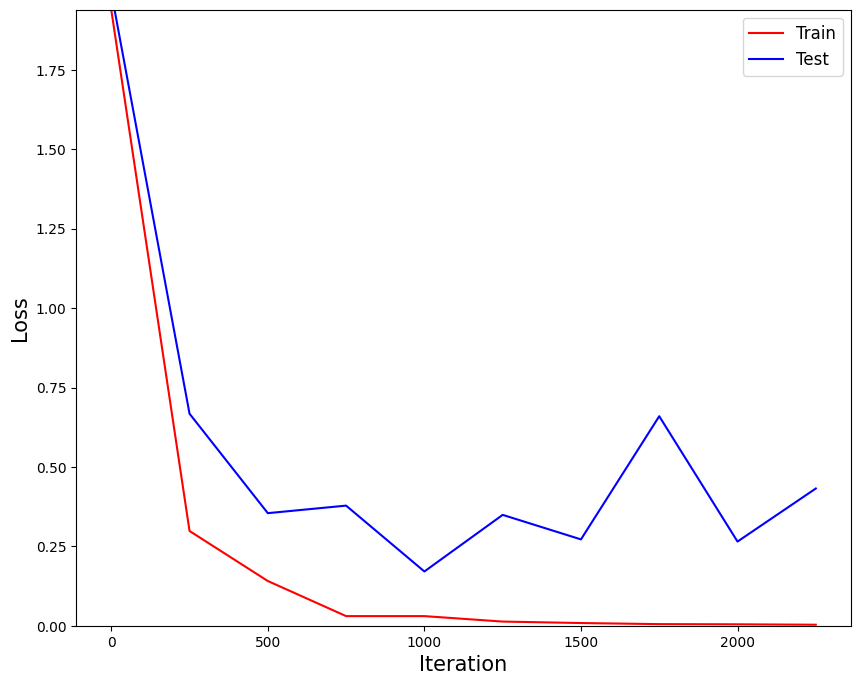

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
from tensorflow.keras.utils import to_categorical
tf.disable_v2_behavior()

n_batch = 50
n_iter = 2500
n_prt = 250

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record_train = []
loss_record_test = []

for epoch in range(n_iter):

    batch_indices = np.random.choice(train_x.shape[0], size=n_batch, replace=False)
    batch_x = train_x[batch_indices]
    batch_y = train_y[batch_indices]

    batch_x = np.reshape(batch_x, (-1, 100, 100, 1))
    #batch_y = tf.keras.utils.to_categorical(batch_y, num_classes=n_output)
    sess.run(optm, feed_dict={x:batch_x, y:batch_y})

    if epoch % n_prt == 0:

        test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
        test_batch_x = test_x[test_batch_indices]
        test_batch_y = test_y[test_batch_indices]

        test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))
        #test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=n_output)
        c1 = sess.run(loss, feed_dict={x: batch_x, y: batch_y})
        c2 = sess.run(loss, feed_dict={x: test_batch_x, y: test_batch_y})

        loss_record_train.append(c1)
        loss_record_test.append(c2)
        print("Iter : {}".format(epoch))
        print("Train Loss : {}".format(c1))
        print("Cost : {}".format(c2))

plt.figure(figsize = (10,8))
plt.plot(np.arange(len(loss_record_train))*n_prt, loss_record_train, 'r', label = 'Train')
plt.plot(np.arange(len(loss_record_test))*n_prt, loss_record_test, 'b', label = 'Test')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend(fontsize = 12)
plt.ylim([0, np.max(loss_record_train)])
plt.show()

In [157]:
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))

#test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=n_output) d

my_pred = sess.run(pred, feed_dict={x: test_batch_x.reshape(-1, 100, 100, 1)})
my_pred = np.argmax(my_pred, axis=1)


labels = np.argmax(test_batch_y, axis=1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {}".format(accr*100))

Accuracy : 96.0


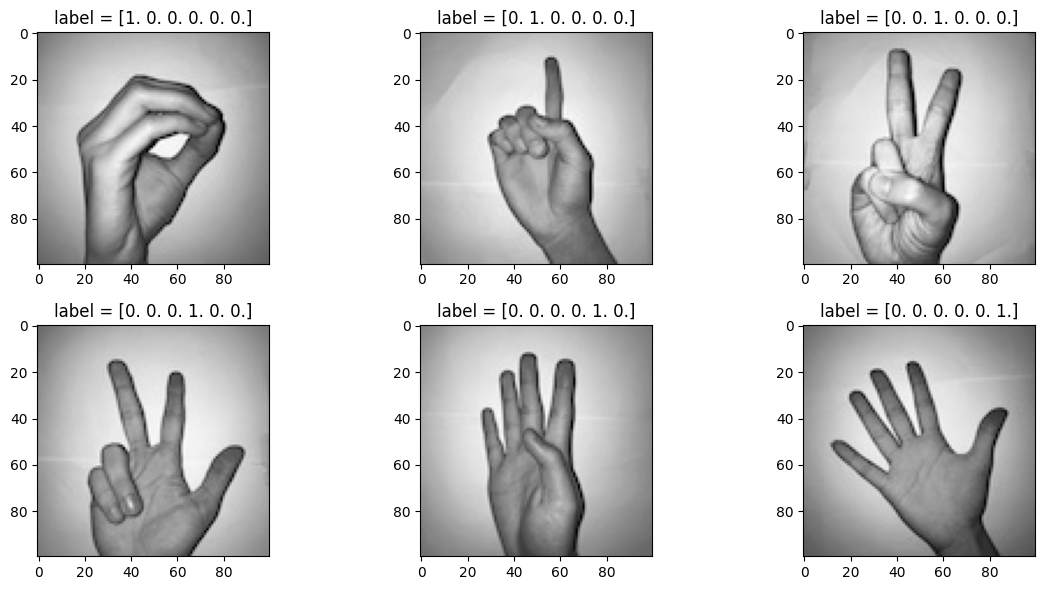

In [158]:
import matplotlib.pyplot as plt
import numpy as np

n_output = 6

plt.figure(figsize=(12, 6))
for i in range(n_output):

    indice = np.where(np.argmax(test_y, axis=1) == i)[0]

    if len(indice) > 0:
        idx = np.random.choice(indice)
        img = test_x[idx].reshape(100, 100)
        vec = test_y[idx]
        label = np.argmax(vec)

        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"label = {vec}")
        plt.axis('on')

plt.tight_layout()
plt.show()

문제 3) K-means clustering

In [159]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
data1 = np.array((np.random.normal(0, 0.2, 100), np.random.normal(0.0, 0.4, 100)))
data2 = np.array((np.random.normal(1.2, 0.3, 100), np.random.normal(1.1, 0.7, 100)))
data3 = np.array((np.random.normal(1.6, 0.2, 100), np.random.normal(1.8, 0.7, 100)))
data4 = np.array((np.random.normal(0.3, 0.1, 100), np.random.normal(0.5, 0.3, 100)))

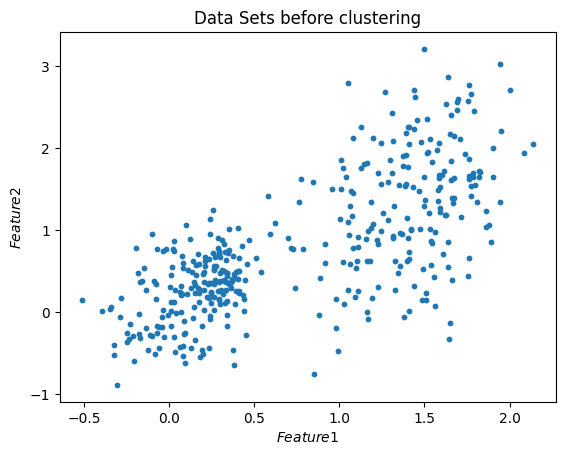

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = np.hstack((data1, data2, data3, data4)).T
df = pd.DataFrame(df, columns=["Feature1", "Feature2"])

X = df[["Feature1", "Feature2"]].values
N, num_features = X.shape[0], X.shape[1]
K = 4

plt.figure(0)
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Data Sets before clustering")
plt.xlabel(r'$Feature1$')
plt.ylabel(r'$Feature2$')
plt.show()

In [161]:
def initialize_centroids(K, num_features):
    return np.zeros((K, num_features))

In [162]:
def update_cluster(X, centroids):
    r = np.zeros((N,K))
    distances = np.zeros((N,K))
    for i in range(N):
        for k in range(K):
            distances[i,k] = np.sum((X[i] - centroids[k])**2)
    nearest_centroid = np.argmin(distances, axis=1)
    r[np.arange(N), nearest_centroid] = 1
    return r, nearest_centroid, distances

In [163]:
def update_centroid(X, r, centroids):
    new_centroids = np.zeros((K, num_features))
    for k in range(K):
        if np.sum(r[:, k]) > 0:
            for i in range(N):
                new_centroids[k] += r[i,k]*X[i]
            new_centroids[k] /= np.sum(r[:,k])
        else:
            new_centroids[k] = centroids[k]
    return new_centroids

In [164]:
def kmeans(X, K, max_iters=100, epsilon=1e-6):
    N = X.shape[0]
    centroids = initialize_centroids(K, num_features)
    J = 1e6
    for iter in range(max_iters):
        r, nearest_centroid, distances = update_cluster(X,centroids)
        new_centroids = update_centroid(X, r, centroids)
        new_J = 0
        for i in range(N):
            for k in range(K):
                new_J += r[i,k]*distances[i,k]
        if np.abs((new_J - J)/new_J) < epsilon:
            break
        centroids = new_centroids
        J = new_J
        print('Iter :', iter, 'J : ', J)
    return nearest_centroid, centroids

Iter : 0 J :  927.8306088889756
Iter : 1 J :  311.6799924252245
Iter : 2 J :  183.64690105318968
Iter : 3 J :  129.90046357629475
Iter : 4 J :  117.11457689967048
Iter : 5 J :  112.36249884648484
Iter : 6 J :  106.03016801189159
Iter : 7 J :  95.67019202818075
Iter : 8 J :  78.50274586880711
Iter : 9 J :  72.77020643033605
Iter : 10 J :  71.88885310263639
Iter : 11 J :  71.6210889986698
Iter : 12 J :  71.59758433012819
Iter : 13 J :  71.58109840441202
Iter : 14 J :  71.49497233341026
Iter : 15 J :  71.47121991070301
Iter : 16 J :  71.46190215559969
Iter : 17 J :  71.45833626184569


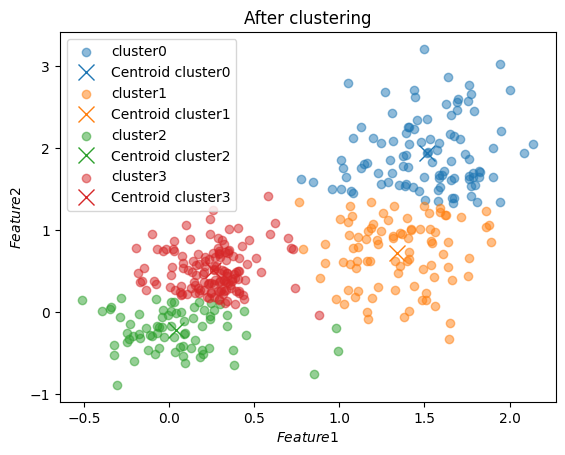

In [165]:
nearest_centroid, centroids = kmeans(X, K)

plt.figure(1)
for i in range(K):
    plt.scatter(X[nearest_centroid == i, 0], X[nearest_centroid == i, 1], alpha = 0.5, label=f'cluster{i}')
    plt.plot(centroids[i, 0], centroids[i, 1], 'x', markersize=12, label=f'Centroid cluster{i}')
plt.legend()
plt.title("After clustering")
plt.xlabel(r'$Feature1$')
plt.ylabel(r'$Feature2$')
plt.show()